# **Functional Analytics**
### 015027 - MERLIN JOHN

**Context and Content**

A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials, demographics, experience data predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.



**Note:**

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.



**Features**

enrollee_id : Unique ID for candidate

city: City code

city_ development _index : Developement index of the city (scaled)

gender: Gender of candidate

relevent_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline :Education major discipline of candidate

experience: Candidate total experience in years

company_size: No of employees in current employer's company

company_type : Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change



Dataset- data taken from Kaggle: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists/tasks?taskId=3015

In [7]:
# 1.0 Call libraries
# 1.1 Data manipulation libraries
import numpy as np
import pandas as pd

# 1.2 sklearn libraries
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split

# 1.3 For plotting NN model
#  conda install -c anaconda graphviz
#  conda install -c anaconda pydot
from skimage import io
import pydot

# 1.4 Keras model components
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dropout, Dense, concatenate, GRU, Embedding, Flatten
from tensorflow.keras.layers import Conv1D, Reshape
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping

# 1.4.1 For text (word) to integer transformation
from tensorflow.keras.preprocessing.text import Tokenizer

# 1.4.2 For making all integer sequences of equal length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 1.4.3 Import backend to invoke tensorflow commands to manipulate tensors
from tensorflow.keras import backend as K

# 1.5 Plotting libraries
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
%matplotlib inline 

# 1.6 Misc
import math, time, os,gc

In [8]:
# 1.7 Print all outputs from a cell

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [12]:
# Load dataset train 
df= pd.read_csv("aug_train.csv")

In [13]:
# delete enrolle_id features.
df.sort_values(["enrollee_id"])

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
17321,1,city_103,0.920,Male,No relevent experience,no_enrollment,High School,NaN,2,NaN,Pvt Ltd,never,150,0.0
6730,2,city_103,0.920,Male,No relevent experience,no_enrollment,Phd,STEM,15,10000+,NGO,3,128,1.0
10024,4,city_103,0.920,Male,No relevent experience,no_enrollment,Masters,STEM,9,50-99,Public Sector,>4,13,0.0
15817,5,city_67,0.855,Male,Has relevent experience,no_enrollment,Masters,STEM,10,<10,Early Stage Startup,1,12,0.0
4552,7,city_136,0.897,Male,Has relevent experience,Full time course,Masters,STEM,13,NaN,NaN,1,18,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17935,33375,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,16,50-99,Public Sector,1,51,0.0
5009,33376,city_16,0.910,Female,Has relevent experience,no_enrollment,Masters,Business Degree,8,1000-4999,Public Sector,4,74,0.0
3351,33377,city_65,0.802,Male,Has relevent experience,no_enrollment,Graduate,Other,10,100-500,Pvt Ltd,2,27,0.0
4756,33379,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,18,<10,Pvt Ltd,2,81,0.0


In [14]:
df.drop(["enrollee_id"], axis = 'columns', inplace=True)

In [15]:
# visualize features
df.columns

Index(['city', 'city_development_index', 'gender', 'relevent_experience',
       'enrolled_university', 'education_level', 'major_discipline',
       'experience', 'company_size', 'company_type', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [16]:
# Check dataframe basic info
print("Dataset has {0} Rows".format(df.shape[0]))
print("Dataset has {0} Cols".format(df.shape[1]))

Dataset has 19158 Rows
Dataset has 13 Cols


In [17]:
 # Check unique values 
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 city                      123
city_development_index     93
gender                      3
relevent_experience         2
enrolled_university         3
education_level             5
major_discipline            6
experience                 22
company_size                8
company_type                6
last_new_job                6
training_hours            241
target                      2
dtype: int64


0.0    0.750652
1.0    0.249348
Name: target, dtype: float64


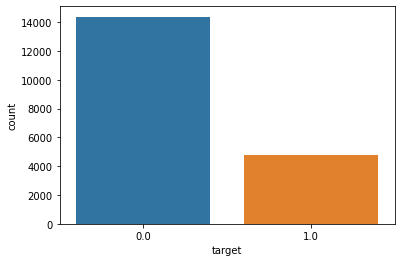

In [18]:
# visualize target
import seaborn as sns
sns.countplot(x=df['target']);
print(df.target.value_counts(normalize=True))

In [19]:
# Missings values

null_count = df.isnull().sum()
null_percentage = round((df.isnull().sum()/df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
9,company_type,6140,32.05
8,company_size,5938,30.99
2,gender,4508,23.53
6,major_discipline,2813,14.68
5,education_level,460,2.40
10,last_new_job,423,2.21
4,enrolled_university,386,2.01
7,experience,65,0.34
0,city,0,0.00
1,city_development_index,0,0.00


In [20]:
# check duplicates values and delete.
df.duplicated().sum()
df.drop_duplicates()

49

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


## Analyse and Cleaning Data

### City

In [21]:
# Check values
df['city'].unique().tolist()

['city_103',
 'city_40',
 'city_21',
 'city_115',
 'city_162',
 'city_176',
 'city_160',
 'city_46',
 'city_61',
 'city_114',
 'city_13',
 'city_159',
 'city_102',
 'city_67',
 'city_100',
 'city_16',
 'city_71',
 'city_104',
 'city_64',
 'city_101',
 'city_83',
 'city_105',
 'city_73',
 'city_75',
 'city_41',
 'city_11',
 'city_93',
 'city_90',
 'city_36',
 'city_20',
 'city_57',
 'city_152',
 'city_19',
 'city_65',
 'city_74',
 'city_173',
 'city_136',
 'city_98',
 'city_97',
 'city_50',
 'city_138',
 'city_82',
 'city_157',
 'city_89',
 'city_150',
 'city_70',
 'city_175',
 'city_94',
 'city_28',
 'city_59',
 'city_165',
 'city_145',
 'city_142',
 'city_26',
 'city_12',
 'city_37',
 'city_43',
 'city_116',
 'city_23',
 'city_99',
 'city_149',
 'city_10',
 'city_45',
 'city_80',
 'city_128',
 'city_158',
 'city_123',
 'city_7',
 'city_72',
 'city_106',
 'city_143',
 'city_78',
 'city_109',
 'city_24',
 'city_134',
 'city_48',
 'city_144',
 'city_91',
 'city_146',
 'city_133',
 'city_

In [22]:
# count values
len(df['city'].unique().tolist())

123

In [23]:
# delete this features
df.drop(['city'], axis=1,inplace=True)

### City_development_index

In [24]:
# check values
df['city_development_index'].unique().tolist()

[0.92,
 0.7759999999999999,
 0.624,
 0.789,
 0.767,
 0.764,
 0.762,
 0.913,
 0.926,
 0.8270000000000001,
 0.843,
 0.804,
 0.855,
 0.887,
 0.91,
 0.884,
 0.924,
 0.6659999999999999,
 0.5579999999999999,
 0.923,
 0.794,
 0.754,
 0.939,
 0.55,
 0.865,
 0.698,
 0.893,
 0.7959999999999999,
 0.866,
 0.682,
 0.802,
 0.579,
 0.878,
 0.897,
 0.949,
 0.925,
 0.8959999999999999,
 0.836,
 0.693,
 0.769,
 0.775,
 0.903,
 0.555,
 0.727,
 0.64,
 0.516,
 0.743,
 0.899,
 0.915,
 0.6890000000000001,
 0.895,
 0.89,
 0.847,
 0.527,
 0.7659999999999999,
 0.738,
 0.647,
 0.795,
 0.74,
 0.701,
 0.493,
 0.84,
 0.691,
 0.735,
 0.742,
 0.479,
 0.722,
 0.921,
 0.848,
 0.856,
 0.898,
 0.83,
 0.73,
 0.68,
 0.725,
 0.556,
 0.448,
 0.763,
 0.745,
 0.645,
 0.7879999999999999,
 0.78,
 0.512,
 0.7390000000000001,
 0.563,
 0.518,
 0.8240000000000001,
 0.487,
 0.649,
 0.7809999999999999,
 0.625,
 0.807,
 0.664]

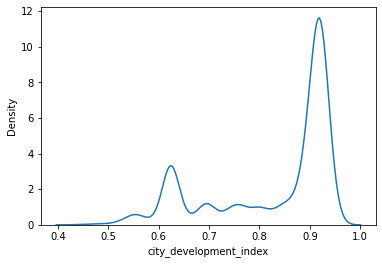

In [25]:
# visualize features
sns.kdeplot(data=df, x="city_development_index")


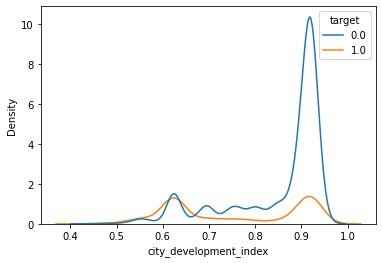

In [26]:
# compare this feature with target
sns.kdeplot(data=df, x="city_development_index", hue="target")


<Figure size 864x360 with 0 Axes>

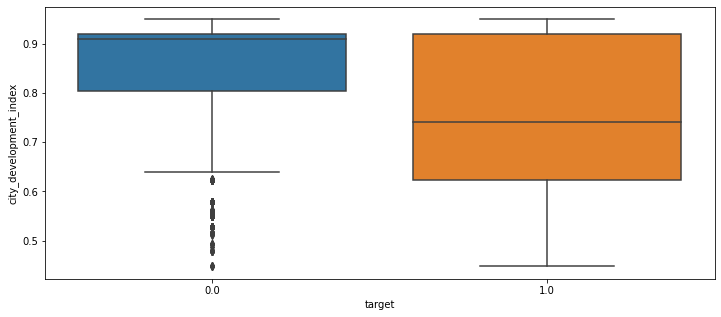

In [27]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='target',y='city_development_index',data=df)
xlabel='Looking for job'
ylabel = 'city_development_index'

### gender

In [28]:
# check values of this features
df['gender'].value_counts()

Male      13221
Female     1238
Other       191
Name: gender, dtype: int64

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Compare Gender')

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Number')

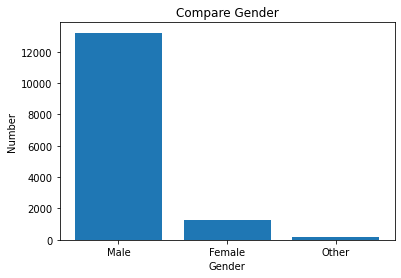

In [29]:
# Visualize gender
# create a figure and axis 
fig, ax = plt.subplots() 
# count the occurrence of each class 
data = df['gender'].value_counts() 
# get x and y data 
points = data.index 
frequency = data.values 
# create bar chart 
ax.bar(points, frequency) 

# set title and labels 
ax.set_title('Compare Gender') 
ax.set_xlabel('Gender') 
ax.set_ylabel('Number')

In [30]:
# missings values 
df['gender'].isna().sum()

4508

In [31]:
# filling missings values with random imputation, 50% female, 50% male
from random import choice

mask = df["gender"].isna()

df.loc[mask,["gender"]] = df.loc[mask,["gender"]].applymap(lambda _: choice(["Male","Female"]))

In [32]:
# value "Other", in gender  is replace with female values.
df['gender'].replace({"Other": "Female"}, inplace=True)

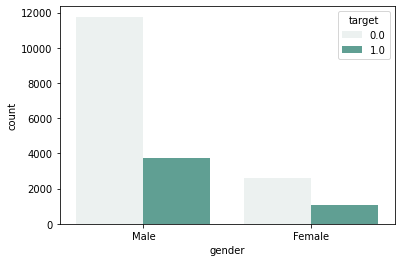

In [33]:
# visualize this features with target
sns.countplot(x=df.gender, hue=df.target, palette='light:#5A9')

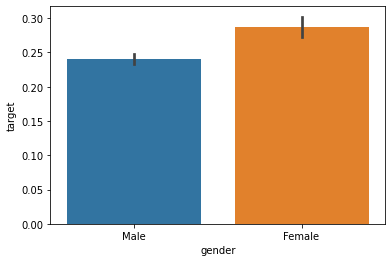

In [34]:
sns.barplot(x="gender", y="target", data=df)
plt.show()

In [35]:
# Binarize male y female feature.
df['Sex_bin'] = df['gender']
df = df.replace({'Sex_bin': {'Male': 0, 'Female': 1}})
df.head(4)

,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target,Sex_bin
0,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0,0
1,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0,0
2,0.624,Male,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0,0
3,0.789,Female,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0,1


In [36]:
# delete this columns
df.drop(['gender'], axis=1,inplace=True)


### Relevent_experience

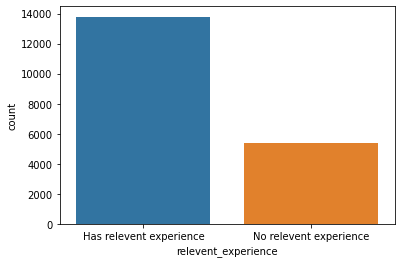

In [37]:
# check values
sns.countplot(x=df.relevent_experience)


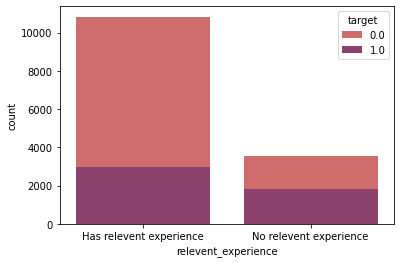

In [38]:
# compare with target
sns.countplot(x=df.relevent_experience, hue=df.target, palette='flare', dodge=False) 

In [39]:
# compare with gender
pd.crosstab(df['relevent_experience'], df['Sex_bin'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)


Sex_bin,0,1
relevent_experience,,
Has relevent experience,73.575163,65.293315
No relevent experience,26.424837,34.706685


In [40]:
# Binarize Relevent_ experience
df['relev_exp_bin'] = df['relevent_experience']
df = df.replace({'relev_exp_bin': {'Has relevent experience': 1, 'No relevent experience': 0}})

In [41]:
# delete this features
df.drop(['relevent_experience'], axis=1,inplace=True)


### education_level

In [42]:
# Missin values
df['education_level'].isna().sum()


460

In [43]:
# filling missing values
df['education_level'].fillna('High School', inplace=True)

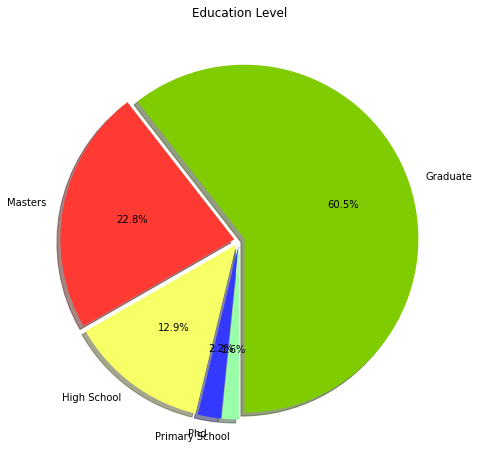

In [44]:
# visualize data
labels = list(df["education_level"].value_counts().index)
values = list(df["education_level"].value_counts().values)

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, autopct="%1.1f%%",
        colors=["#7fcc00", "#ff3a33", "#f7ff66", "#3339ff", "#99ffa9"],
        shadow=True, explode = [0.03, 0.03, 0.03, 0.03, 0.03],
        startangle=270)
plt.title("Education Level");

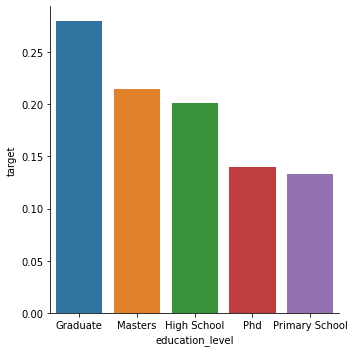

In [45]:
# compare this feature with target
sns.catplot(x="education_level", y="target", data=df, kind="bar", ci=None)

### enrolled_university

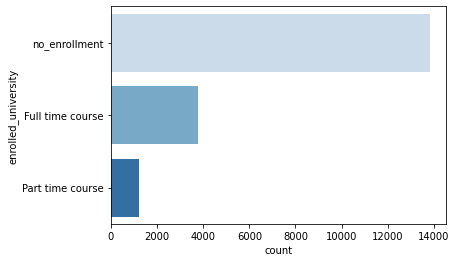

In [46]:
# check values
sns.countplot(y= df['enrolled_university'], palette="Blues")


In [47]:
df.drop(['enrolled_university'],axis=1,inplace=True) 
# delete this columns because is not useful

### major_discipline

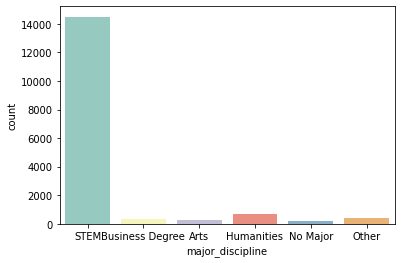

In [48]:
# check values
sns.countplot(x=df.major_discipline, palette="Set3")

In [49]:
# compare this features with target
pd.crosstab(df['major_discipline'], df['target'], margins=False).apply(lambda r:(r/r.sum())*100, axis=0)

target,0.0,1.0
major_discipline,,
Arts,1.650574,1.253548
Business Degree,1.988941,2.034059
Humanities,4.357514,3.334910
No Major,1.386482,1.300851
Other,2.302550,2.412488
STEM,88.313939,89.664144


<Figure size 576x360 with 0 Axes>

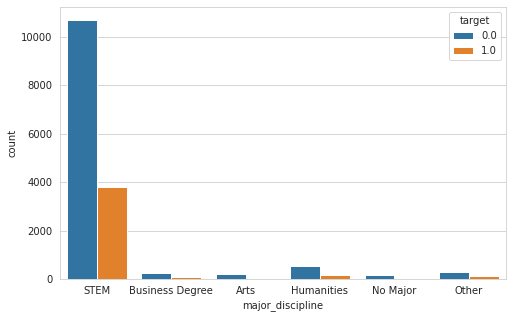

In [50]:
# visualize this feature with target.
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'major_discipline',hue='target',data=df)

In [51]:
# delete this feature, is note very helpful
df.drop(['major_discipline'], axis=1,inplace=True)


### Experience

In [52]:
# missing values
df['experience'].isna().sum()

65

In [53]:
df['experience'].fillna("0", inplace=True)

In [54]:
df["experience"].replace({">20": "21","<1":"0"}, inplace=True)

In [55]:
df["experience"] = pd.to_numeric(df["experience"])

In [56]:
df["experience"] = pd.to_numeric(df["experience"])

In [57]:
df["experience"].dtypes

dtype('int64')

<Figure size 1080x504 with 0 Axes>

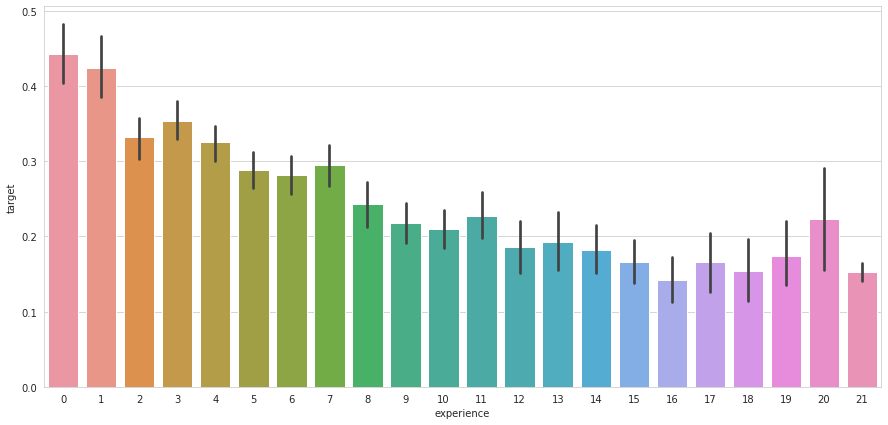

In [58]:
# visuealize with target
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="experience", y="target", data=df)

In [59]:
# Imputation
bins = [0, 5, 10, 15, 20, np.inf]
labels = ['0-5', '5-10', '10-15', '15-20', '+20']
for score in df:
    df['years_experience'] = pd.cut(df["experience"], bins=bins, labels=labels)

<Figure size 1080x504 with 0 Axes>

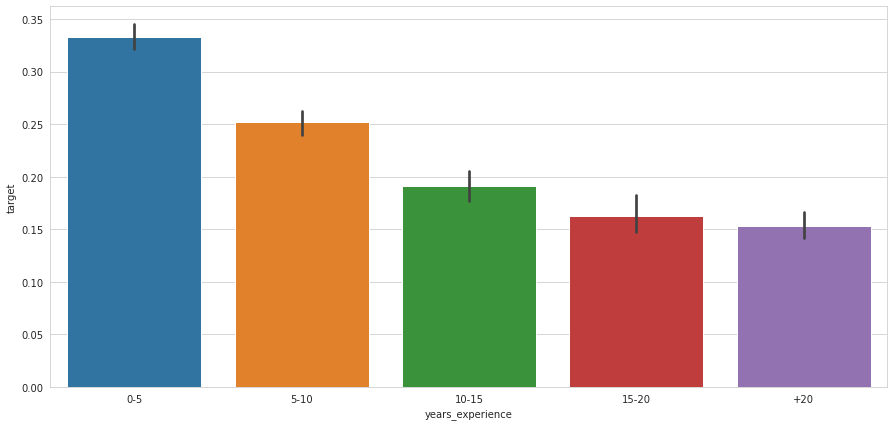

In [60]:
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="years_experience", y="target", data=df)

In [61]:
df.drop(['experience'], axis=1,inplace=True)


### company_size

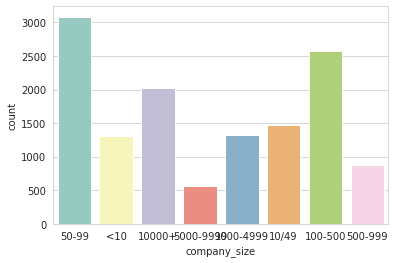

In [62]:
sns.countplot(x=df.company_size, palette="Set3")


In [63]:
# Missing values.
df['company_size'].isna().sum()

5938

In [64]:
df['company_size'].fillna(method='ffill', limit=1, inplace=True)

In [65]:
df['company_size'].fillna(method='bfill', limit=1, inplace=True)

In [66]:
# Imputation, reduce values
df['company_size'] = df.company_size.replace({'50-99':"Medium",
"<10":"Small",
"10000+":"Big",
"5000-9999": "Big",
"1000-4999":"Big",
"10/49":"Small",
"100-500":"Medium",
"500-999":"Big"})

<Figure size 576x360 with 0 Axes>

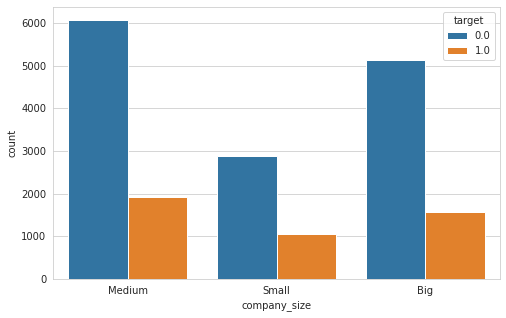

In [67]:
# compare with target
plt.figure(figsize=(8, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_size',hue='target',data=df)

In [68]:
# Missing values.
df['company_size'].isna().sum()

538

In [69]:
df['company_size'] = df.company_size.fillna("Small")


### Company_type


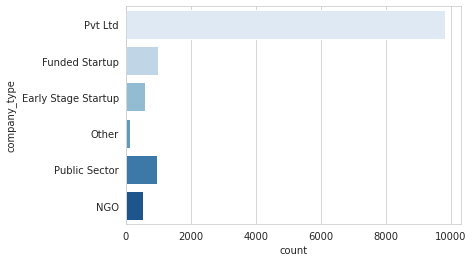

In [70]:
sns.countplot(y= df['company_type'], palette="Blues") 


<Figure size 720x360 with 0 Axes>

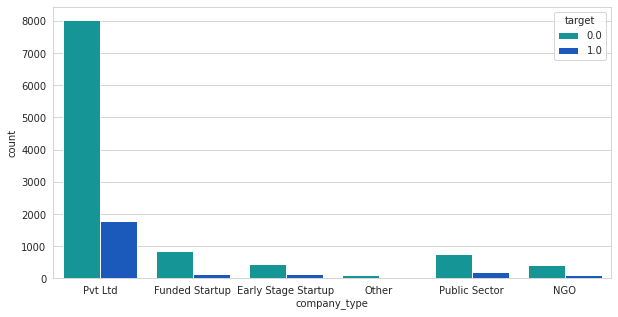

In [71]:
# compare with target
plt.figure(figsize=(10, 5))
sns.set_style('whitegrid')
sns.countplot(x = 'company_type',hue='target',data=df,palette='winter_r')

In [72]:
# missing values
df['company_type'].isnull().sum()/len(df)*100

32.04927445453596

In [73]:
#Too much missing values, so we delete this features
df.drop(['company_type'], axis=1,inplace=True)


### last_new_job

In [74]:
# missing values
df['last_new_job'].fillna('never', inplace=True)

In [75]:
# replace values
df["last_new_job"].replace({">4": "5","never":"0"}, inplace=True)

In [76]:
df["last_new_job"] = pd.to_numeric(df["last_new_job"])

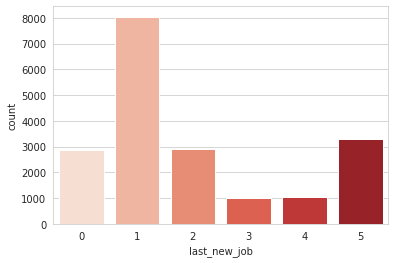

In [77]:
sns.countplot(x=df.last_new_job, palette="Reds")


<Figure size 1080x504 with 0 Axes>

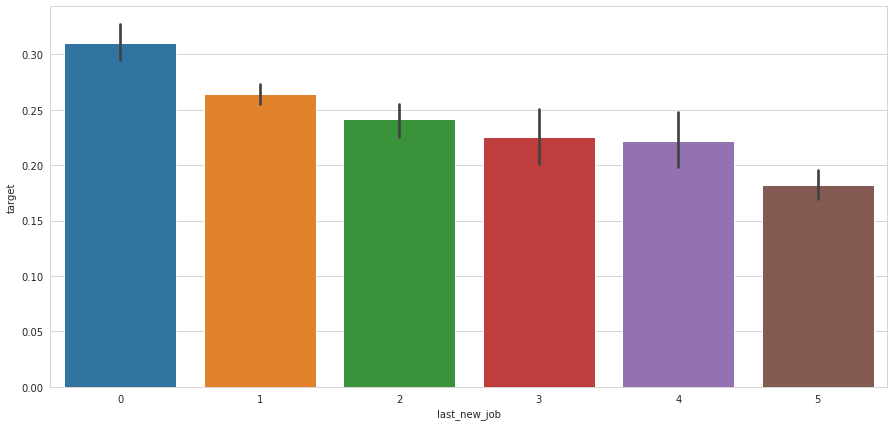

In [78]:
plt.figure(figsize= [15.0, 7.0])
sns.barplot(x="last_new_job", y="target", data=df)

### training_hours

<Figure size 864x360 with 0 Axes>

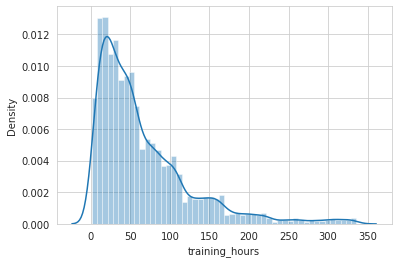

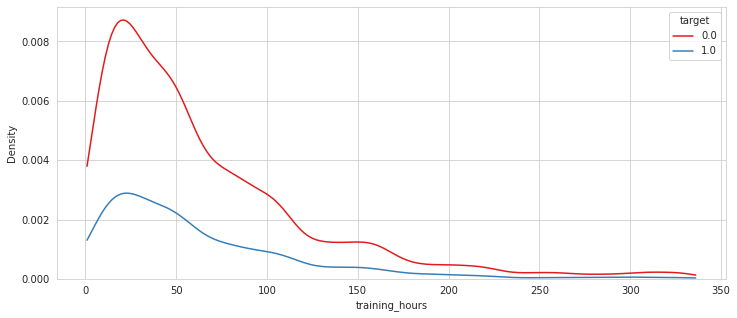

In [79]:
sns.distplot(df.training_hours);
plt.figure(figsize=(12, 5))
sns.set_style('whitegrid')
sns.kdeplot(data=df, x="training_hours", hue="target",cut = 0,palette='Set1')


### Missing values

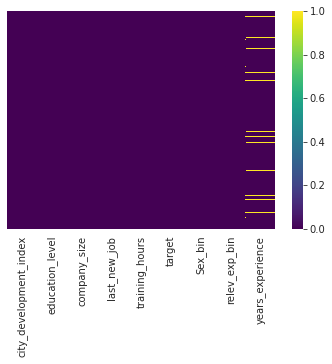

In [80]:
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [81]:
# delete missing values
df.dropna(inplace=True)

# Machine Learning

In [82]:
# Standarize features
cols_to_standarize = ['training_hours','last_new_job']
for col in cols_to_standarize:
  df[col] = preprocessing.scale(df[col], axis=0, copy=False)

In [83]:
# get dummies, object features
categorical_feature = (df.dtypes == "category") | (df.dtypes == object)
categorical_cols = df.columns[categorical_feature].tolist()
df = pd.get_dummies(df, columns=categorical_cols)

In [84]:
# correlation 
correlation_matrix = df.corr()

<Figure size 1440x864 with 0 Axes>

Text(0.5, 1.0, 'Pearson Correlation of Features')

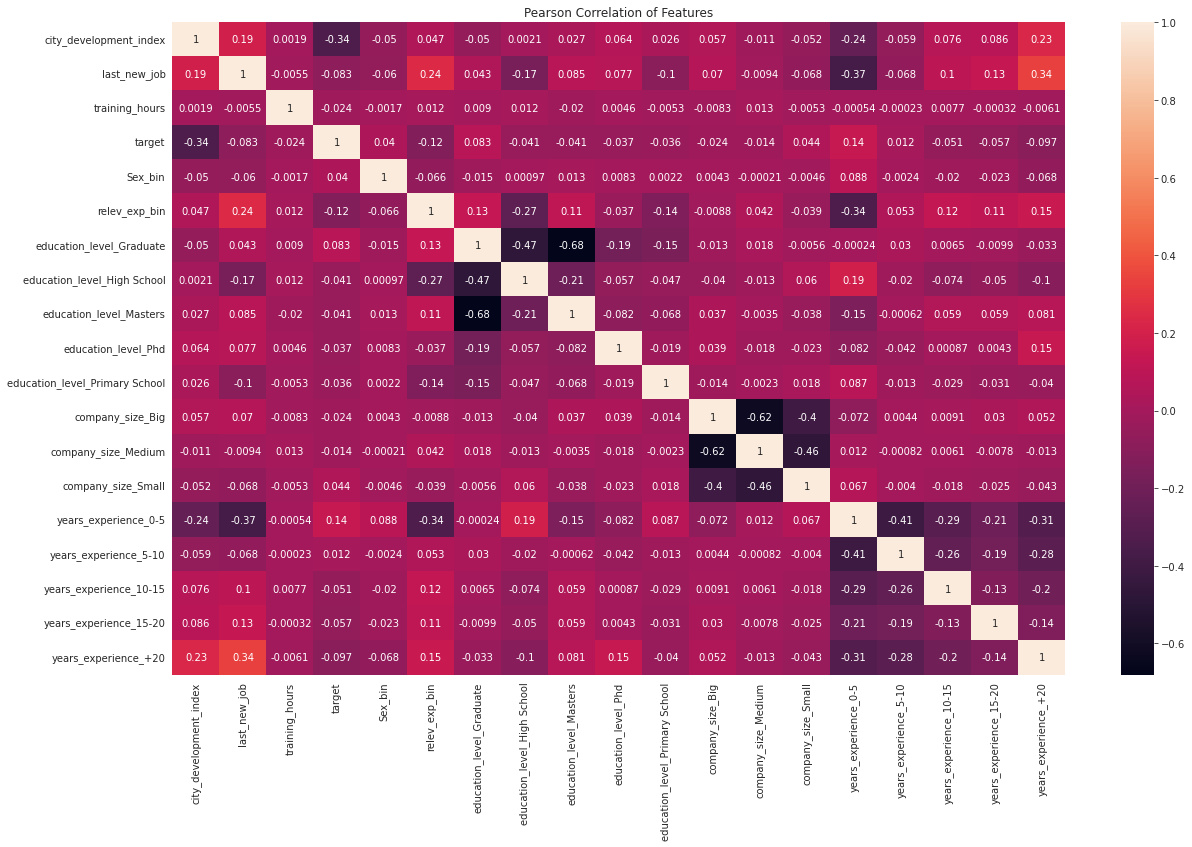

In [85]:
plt.figure(figsize=(20.0,12.0))
plt.title('Pearson Correlation of Features')
sns.heatmap(correlation_matrix, annot=True)

In [86]:
# show up the most features correlate
corr = df.corr()
print(corr['target'].sort_values(ascending=False)[:6], '\n')
print(corr['target'].sort_values(ascending=False)[-6:])

target                      1.000000
years_experience_0-5        0.142562
education_level_Graduate    0.083462
company_size_Small          0.043558
Sex_bin                     0.040091
years_experience_5-10       0.011927
Name: target, dtype: float64 

years_experience_10-15   -0.051376
years_experience_15-20   -0.057003
last_new_job             -0.082599
years_experience_+20     -0.097432
relev_exp_bin            -0.124892
city_development_index   -0.335307
Name: target, dtype: float64


In [87]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [88]:
# Get the most importance features with SelectKBest method
selector = SelectKBest(score_func=f_classif)
X_new = selector.fit_transform(X, y)

scores = sorted(zip(map(lambda x: round(x, 4), selector.scores_), X.columns), reverse=True)
pd.DataFrame(scores, columns=['Score', 'target']).head(6)

,Score,target
0,2352.1829,city_development_index
1,385.2258,years_experience_0-5
2,294.2274,relev_exp_bin
3,177.9646,years_experience_+20
4,130.2580,education_level_Graduate
5,127.5578,last_new_job


In [89]:
X=df[['city_development_index','years_experience_0-5','relev_exp_bin','years_experience_+20','education_level_Graduate','last_new_job']]

In [90]:
y = df['target']

### Machine Learning 


In [91]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 1000)

### Inputs
<b>Input transforms numpy array into tensors to be used by subsequent layers.</b><br><br>
<i>Input()</i> is used to instantiate a class that will perform the transformation to Keras tensor.
<u>Inputs is the shape of each object.</u> <br> In a tabular data, each row is an object. In Image data, each image is an object. So, in the former case, it is one dimensional and in the later case two-dimensional.  <br><br>
**Purpose**: *Purpose of Input is to tell the rest of the model as to what tensor object is to be expected by the rest of model*

```
tf.keras.Input(
    shape=None, batch_size=None, name=None, dtype=None, sparse=None, tensor=None,
    ragged=None, type_spec=None, **kwargs
)
```

In [92]:
import tensorflow as tf

In [93]:
# Design model

#       Inputs to model. Note that inputs is NOT
#       a part of layers object
#       Input() is used to instantiate a Keras tensor.
#       This tensor will get populated when .fit() is
#       invoked and data starts flowing in.
#       Purpose: Define what tensor shape is to be expected
#                by the model

inputs = tf.keras.Input(
                         shape = X.shape[1],
                         batch_size=None
                        )

type(inputs)

keras.engine.keras_tensor.KerasTensor

In [94]:
#  Examine the tensor object
print(inputs.dtype)
print(inputs.shape)
print(inputs.name)

<dtype: 'float32'>
(None, 6)
input_1


In [95]:
#  Add layers. Each layer outputs a tensor:

x = layers.Dense(100, activation = 'relu')(inputs)

In [96]:
#  Get nature of 'x'

print(type(x))
print(x.shape )  # (None, 100)

<class 'keras.engine.keras_tensor.KerasTensor'>
(None, 100)


In [97]:
#  Examine x:

type(x)
x.shape

keras.engine.keras_tensor.KerasTensor

TensorShape([None, 100])

In [98]:
#  Add ome more layer:

x = layers.Dense(100, activation = 'relu')(x)

In [99]:
#  Concatenate 
x = tf.keras.layers.concatenate([x,inputs])


In [100]:
#  Final layer
out = layers.Dense(1,activation = 'sigmoid')(x)

In [101]:
# Create model now
model = Model(inputs = [inputs], outputs = [out])

In [102]:
# Print model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 6)]          0           []                               
                                                                                                  
 dense (Dense)                  (None, 100)          700         ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 100)          10100       ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 106)          0           ['dense_1[0][0]',                
                                                                  'input_1[0][0]']            

In [ ]:
#  `Model` groups layers into an object 
#       with training and inference features.
help(Model)

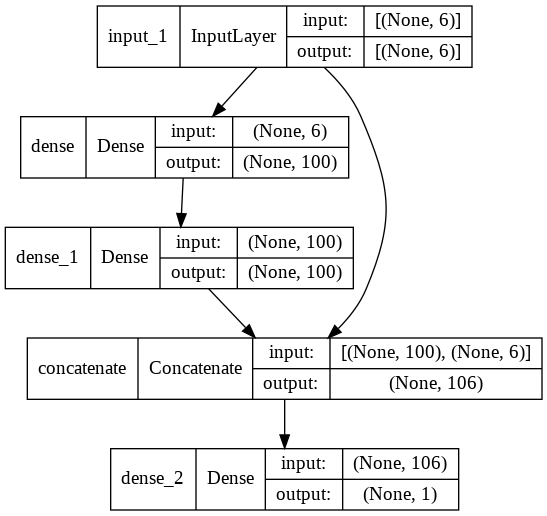

In [104]:
#  Display model now
# Ref: https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model
plot_model(model, show_shapes= True)

In [105]:
#  Compile model
model.compile(loss = "mean_squared_error")  
history = model.fit(
                    X_train,
                    y_train,
                    epochs = 50,
                    verbose = 1
                    )

Epoch 1/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1695
Epoch 2/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1621
Epoch 3/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1599
Epoch 4/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1587
Epoch 5/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1579
Epoch 6/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1572
Epoch 7/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1574
Epoch 8/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1573
Epoch 9/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1571
Epoch 10/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1569
Epoch 11/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1570
Epoch 12/50
465/465 [==============================] - 1s 1ms/step - loss: 0.1569
Epoch 13/50
465/465 [====

In [106]:
 
model.evaluate(X_test,y_test)  

117/117 [==============================] - 0s 961us/step - loss: 0.1561


0.1561417132616043